In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [158]:
df = pd.read_csv('loan/loan.csv')
pd.set_option('display.max_columns', None)


In [159]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

# Summary of Data Provided in Loan Document
## This file contains a dataset of loans provided by a credit company
### A large number of NA columns are present in the dataset

In [160]:
na_percentages = 100*df.isna().mean()
columns_with_high_na = na_percentages[na_percentages > 35]
print (columns_with_high_na)

mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi                            100.000000
total_cu_t

In [161]:
cleaned_df = df.dropna(axis=1, how='all')

In [162]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Also dropping these cols 'mths_since_last_record', 'next_pymnt_d' since they have >90% NA values

In [163]:
drop_col = ['mths_since_last_record', 'next_pymnt_d']
cleaned_df = cleaned_df.drop(drop_col, axis = 1)

In [164]:
cleaned_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [165]:
#cat_cols=["purpose","zip_code","addr_state","delinq_2yrs", "term","grade","sub_grade","home_ownership","emp_length","issue_d","loan_status",
        # "purpose","addr_state","earliest_cr_line","inq_last_6mths", "pub_rec", "initial_list_status","last_pymnt_d","last_credit_pull_d","last_credit_pull_d",
         #"collections_12_mths_ex_med","pub_rec_bankruptcies","tax_liens","acc_now_delinq"]
#num_cols=["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","installment","annual_inc","dti","inq_last_6mths","open_acc", "mths_since_last_delinq", 
        #  "open_acc", "pub_rec_bankruptcies","revol_bal","revol_util","total_acc"
        # "out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp",
        #  "total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_amnt","last_pymnt_amnt"]
#extra_cols=["id","member_id","emp_title","verification_status","pymnt_plan","url","desc","title","zip_code"
         #  "policy_code","application_type",]

### Based on this categorical data it seems that "collections_12_mths_ex_med","pub_rec_bankruptcies","tax_liens","acc_now_delinq" are of limited use (only 1 entry)
### Dropping these columns, also dropping "id", "member_id", "url", "title", zip code, emp title, initial list status "verification_status","pymnt_plan","url","desc","title","policy_code","application_type""addr_state", as it is of limited value

In [166]:
drop_col = ["id", "member_id", "url", "title","collections_12_mths_ex_med","pub_rec_bankruptcies","tax_liens","acc_now_delinq","zip_code","emp_title","initial_list_status","verification_status","pymnt_plan","url","desc","title",
           "policy_code","application_type","addr_state","last_credit_pull_d"]
cleaned_df = cleaned_df.drop(drop_col, axis = 1)

In [167]:
cat_cols=["purpose","delinq_2yrs", "term","grade","sub_grade","home_ownership","emp_length","issue_d","loan_status",
         "purpose","earliest_cr_line","inq_last_6mths", "pub_rec", "last_pymnt_d"]
num_cols=["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","installment","annual_inc","dti","inq_last_6mths","open_acc", "mths_since_last_delinq", 
          "open_acc","revol_bal","revol_util","total_acc"
         "out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp",
          "total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_amnt","last_pymnt_amnt"]

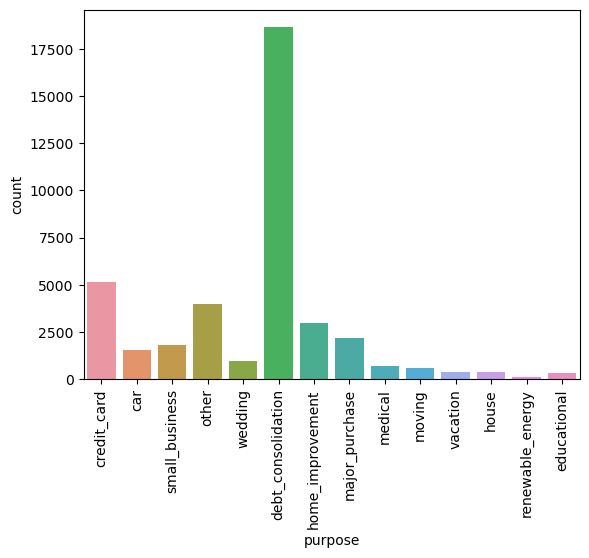

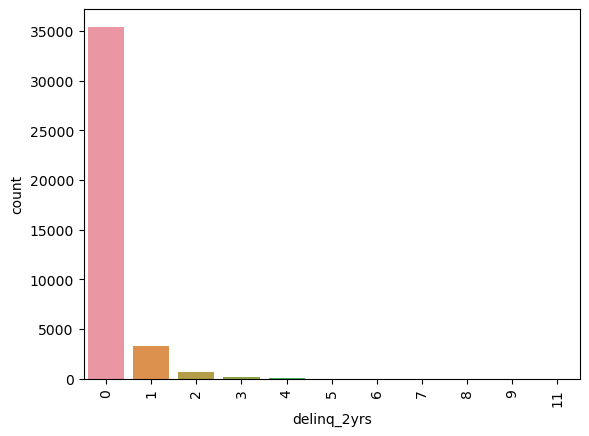

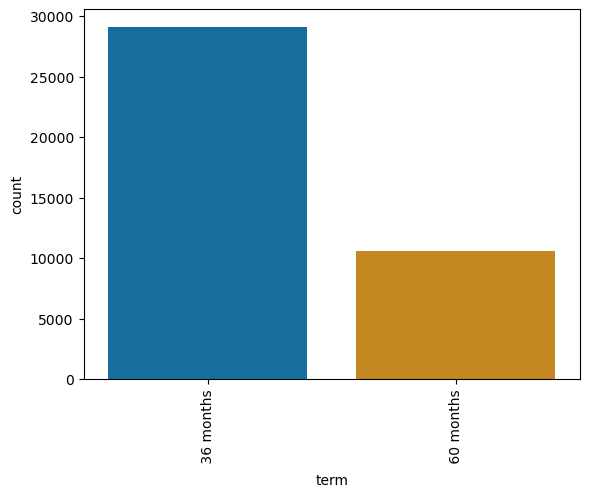

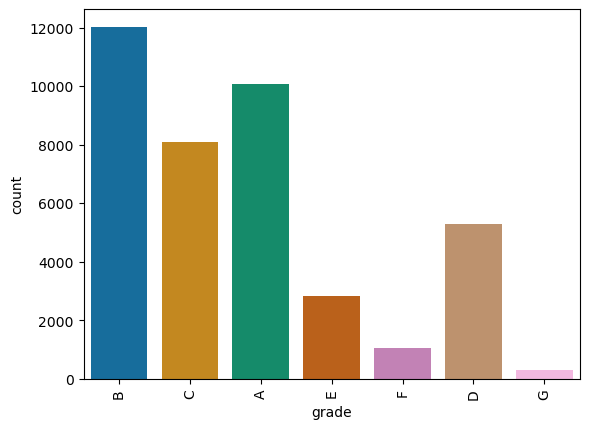

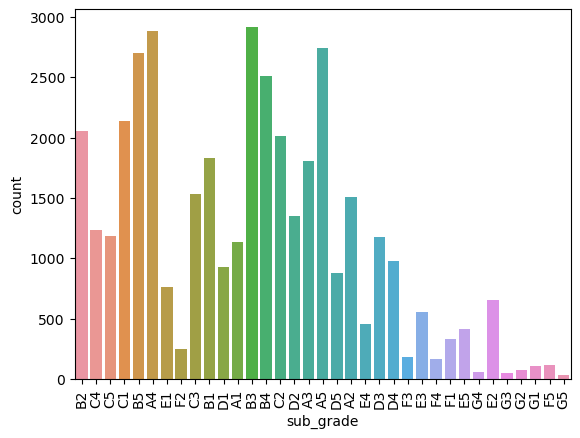

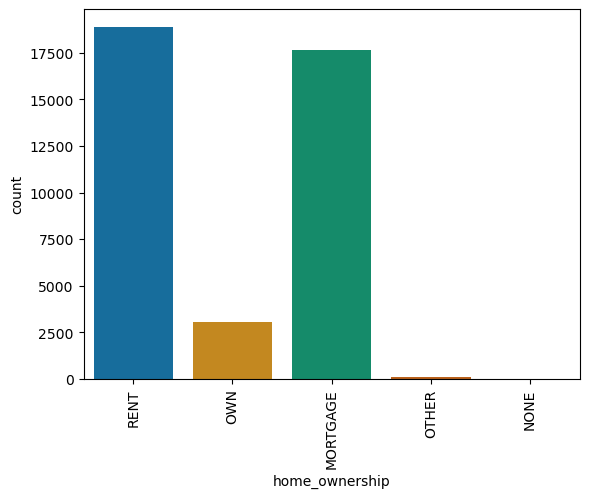

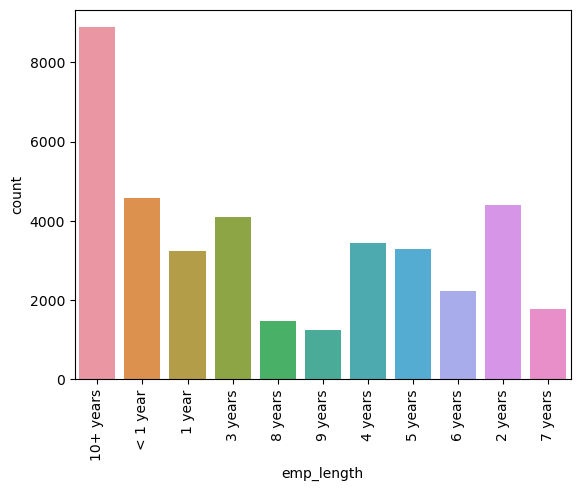

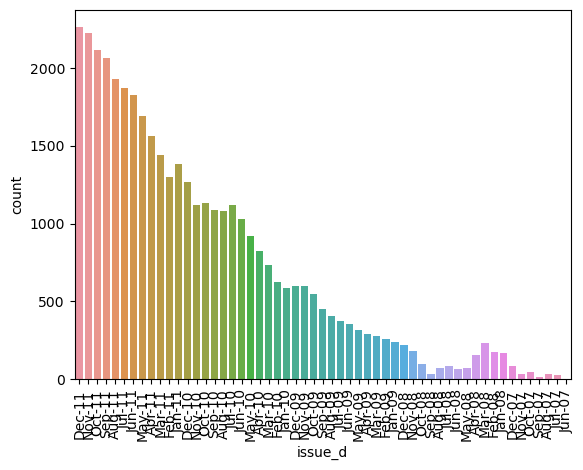

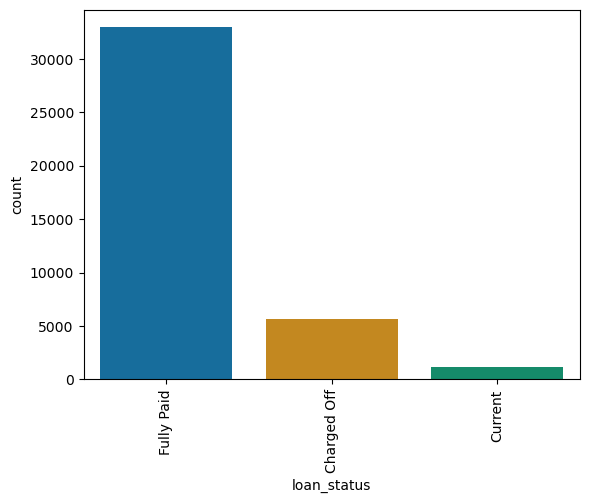

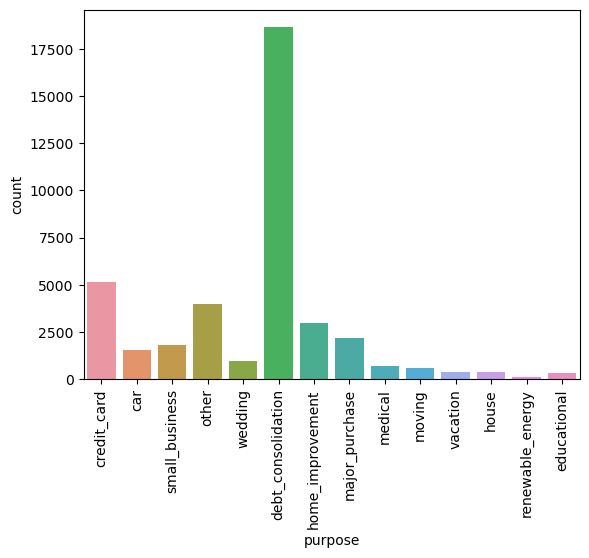

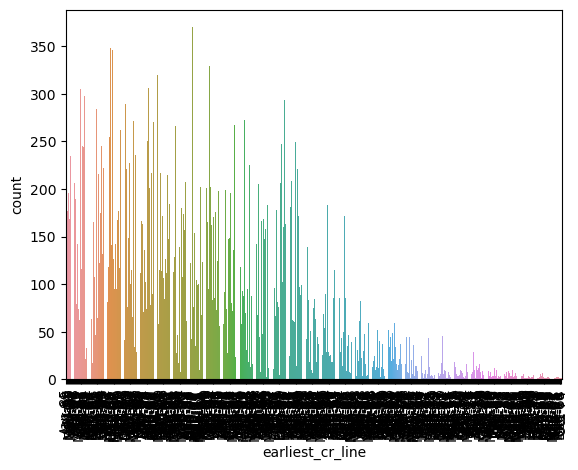

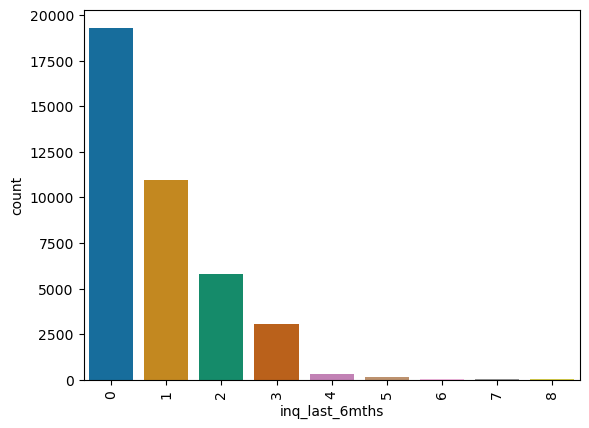

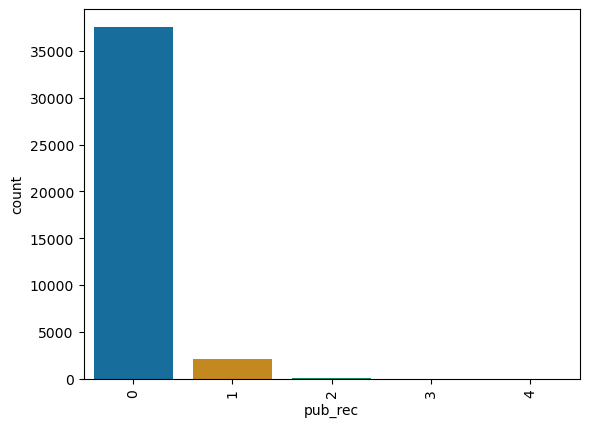

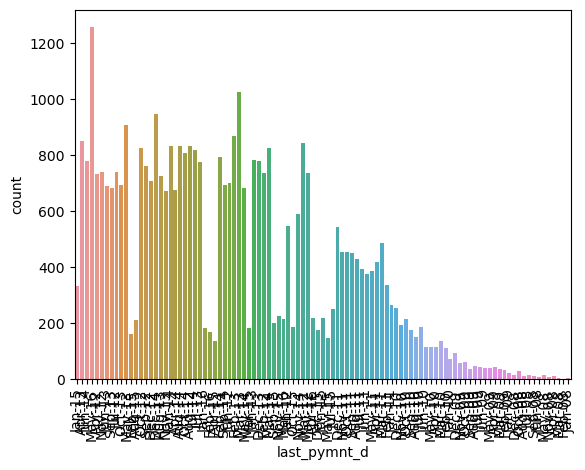

In [168]:
for i in cat_cols:
    sns.countplot(x=cleaned_df[i])
    plt.xticks(rotation=90)
    plt.show()

# Columns that need to be modified
## Home Ownership needs to be merged (remove none, other)
## Loan Status with Current Loans Need be removed

In [169]:
ownership = ['RENT','OWN','MORTGAGE']
filtered_df = cleaned_df[cleaned_df['home_ownership'].isin(ownership)]
loan_completed = ['Fully Paid','Charged Off']
filtered_df  = filtered_df[filtered_df['loan_status'].isin(loan_completed)]

In [170]:
filtered_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,chargeoff_within_12_mths,delinq_amnt
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,0.0,0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Dec-11,Charged Off,car,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,0.0,0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,0.0,0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Dec-11,Fully Paid,other,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,0.0,0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Dec-11,Fully Paid,wedding,11.20,0,Nov-04,3,NaN,9,0,7963,28.30%,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,0.0,0


In [171]:
filtered_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 38476 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 38476 non-null  int64  
 1   funded_amnt               38476 non-null  int64  
 2   funded_amnt_inv           38476 non-null  float64
 3   term                      38476 non-null  object 
 4   int_rate                  38476 non-null  object 
 5   installment               38476 non-null  float64
 6   grade                     38476 non-null  object 
 7   sub_grade                 38476 non-null  object 
 8   emp_length                37443 non-null  object 
 9   home_ownership            38476 non-null  object 
 10  annual_inc                38476 non-null  float64
 11  issue_d                   38476 non-null  object 
 12  loan_status               38476 non-null  object 
 13  purpose                   38476 non-null  object 
 14  dti        

## Features are for post loan sanction evaluation: No use here and must be removed # 
"delinq_2yrs",
"revol_bal",
"out_prncp",
"total_pymnt",
"total_rec_int",
"total_rec_late_fee",
"recoveries",
"collection_recovery_fee",
"last_pymnt_d", 
"last_pymnt_amnt",
"next_pymnt_d" ,
"chargeoff_within_12_mths", 
"mths_since_last_delinq", 
"mths_since_last_record"
"


In [172]:
filtered_df.drop(["out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "chargeoff_within_12_mths", "mths_since_last_delinq"], axis = 1, inplace = True)



In [173]:
filtered_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 38476 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_amnt         38476 non-null  int64  
 1   funded_amnt_inv   38476 non-null  float64
 2   term              38476 non-null  object 
 3   int_rate          38476 non-null  object 
 4   installment       38476 non-null  float64
 5   grade             38476 non-null  object 
 6   sub_grade         38476 non-null  object 
 7   emp_length        37443 non-null  object 
 8   home_ownership    38476 non-null  object 
 9   annual_inc        38476 non-null  float64
 10  issue_d           38476 non-null  object 
 11  loan_status       38476 non-null  object 
 12  purpose           38476 non-null  object 
 13  dti               38476 non-null  float64
 14  earliest_cr_line  38476 non-null  object 
 15  inq_last_6mths    38476 non-null  int64  
 16  open_acc          38476 non-null  int64  
 17

<Axes: xlabel='home_ownership', ylabel='count'>

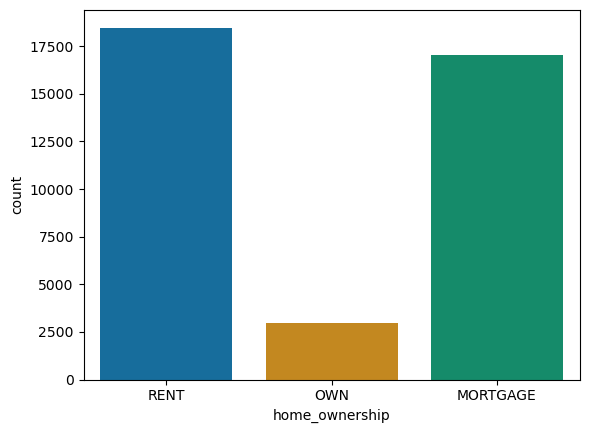

In [174]:
sns.countplot(x=filtered_df['home_ownership'])


<Axes: xlabel='loan_status', ylabel='count'>

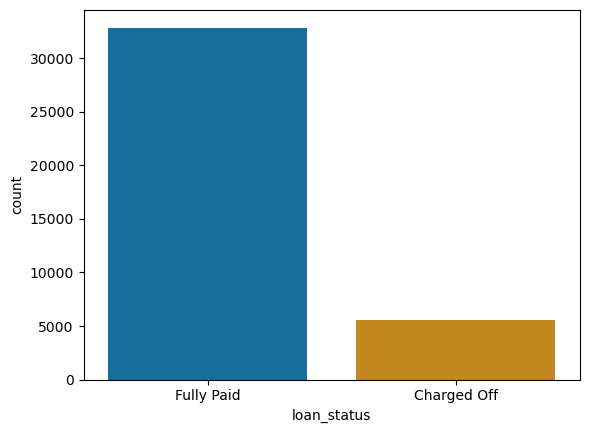

In [175]:
sns.countplot(x=filtered_df['loan_status'])


In [176]:
cat_cols=["purpose", "term","grade","sub_grade","home_ownership","emp_length","issue_d","loan_status",
         "purpose","earliest_cr_line","inq_last_6mths", "pub_rec"]
num_cols=["loan_amnt","funded_amnt_inv","int_rate","installment","annual_inc","dti","inq_last_6mths","open_acc", "mths_since_last_delinq", 
          "open_acc","revol_util","total_acc"]

In [177]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38476 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_amnt         38476 non-null  int64  
 1   funded_amnt_inv   38476 non-null  float64
 2   term              38476 non-null  object 
 3   int_rate          38476 non-null  object 
 4   installment       38476 non-null  float64
 5   grade             38476 non-null  object 
 6   sub_grade         38476 non-null  object 
 7   emp_length        37443 non-null  object 
 8   home_ownership    38476 non-null  object 
 9   annual_inc        38476 non-null  float64
 10  issue_d           38476 non-null  object 
 11  loan_status       38476 non-null  object 
 12  purpose           38476 non-null  object 
 13  dti               38476 non-null  float64
 14  earliest_cr_line  38476 non-null  object 
 15  inq_last_6mths    38476 non-null  int64  
 16  open_acc          38476 non-null  int64  
 17

In [178]:
filtered_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,delinq_amnt
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37,0
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12,0


## Some More Standardization of Data is Required
- "revol_util" and "int_rate" columns, although described as objects are number values 
- "emp_length" >10 years can be made 10 and <1 year can be made 1
- Term has only 2 values 36 and 60, logically these are categorical values 

In [179]:
filtered_df['revol_util']  = filtered_df['revol_util'].str.rstrip('%')
filtered_df['int_rate'] = filtered_df['int_rate'].str.rstrip('%')

In [180]:
#df['column'] = pd.to_numeric(df['column'],errors = 'coerce')
filtered_df['revol_util'] = pd.to_numeric(filtered_df['revol_util'],errors = 'coerce')
filtered_df['int_rate'] = pd.to_numeric(filtered_df['int_rate'],errors = 'coerce')

In [181]:
def convert_emp_length(emp_len):
    if pd.isna(emp_len):
        return None  # Handle NaN values
    if '10+' in emp_len:
        return 10
    elif '<1' in emp_len:
        return 0
    else:
        # Remove non-digit characters and then convert to integer
        return int(''.join(filter(str.isdigit, emp_len)))

In [182]:
# Apply the conversion to the 'emp_length' column
filtered_df['emp_length'] = filtered_df['emp_length'].apply(convert_emp_length)

In [183]:
filtered_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,delinq_amnt
0,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT,24000.0,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9,0
1,2500,2500.0,60 months,15.27,59.83,C,C4,1.0,RENT,30000.0,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4,0
2,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT,12252.0,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10,0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT,49200.0,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37,0
5,5000,5000.0,36 months,7.90,156.46,A,A4,3.0,RENT,36000.0,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12,0


In [184]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38476 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_amnt         38476 non-null  int64  
 1   funded_amnt_inv   38476 non-null  float64
 2   term              38476 non-null  object 
 3   int_rate          38476 non-null  float64
 4   installment       38476 non-null  float64
 5   grade             38476 non-null  object 
 6   sub_grade         38476 non-null  object 
 7   emp_length        37443 non-null  float64
 8   home_ownership    38476 non-null  object 
 9   annual_inc        38476 non-null  float64
 10  issue_d           38476 non-null  object 
 11  loan_status       38476 non-null  object 
 12  purpose           38476 non-null  object 
 13  dti               38476 non-null  float64
 14  earliest_cr_line  38476 non-null  object 
 15  inq_last_6mths    38476 non-null  int64  
 16  open_acc          38476 non-null  int64  
 17

<Axes: >

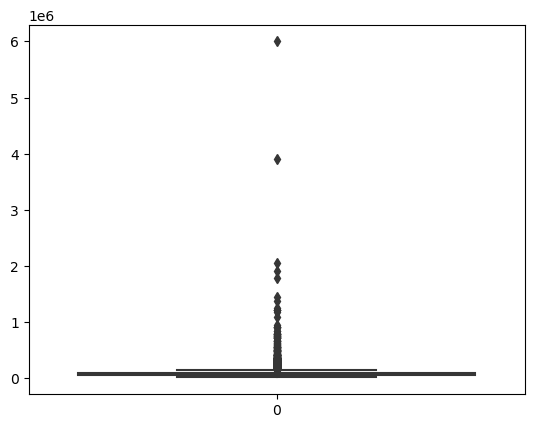

In [185]:
sns.boxplot(filtered_df['annual_inc'])

##Removing outliers

In [186]:
quantile_info = filtered_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58826.28
0.75     82000.00
0.90    115000.00
0.95    140004.00
0.97    165000.00
0.98    187000.00
0.99    234000.00
Name: annual_inc, dtype: float64

In [187]:
per_95_annual_inc = filtered_df['annual_inc'].quantile(0.95)
filtered_df = filtered_df[filtered_df.annual_inc <= per_95_annual_inc]

<Axes: >

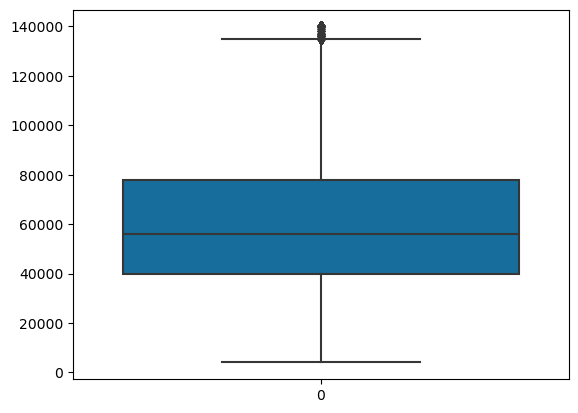

In [188]:
sns.boxplot(filtered_df.annual_inc)

<Axes: >

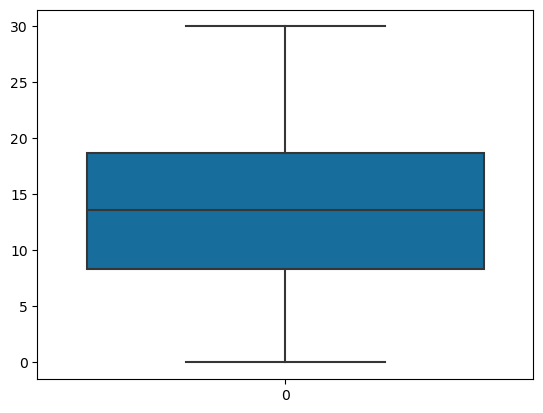

In [189]:
sns.boxplot(filtered_df.dti)

<Axes: >

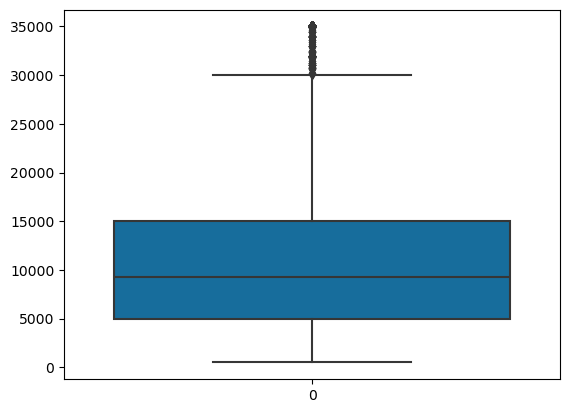

In [190]:
sns.boxplot(filtered_df.loan_amnt)

In [191]:
filtered_df.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.00
0.900    20000.00
0.950    25000.00
0.970    25482.25
0.975    28000.00
0.980    30000.00
0.990    35000.00
1.000    35000.00
Name: loan_amnt, dtype: float64

In [192]:
per_95_loan_amnt = filtered_df['loan_amnt'].quantile(0.95)
filtered_df = filtered_df[filtered_df.loan_amnt <= per_95_annual_inc]

<Axes: >

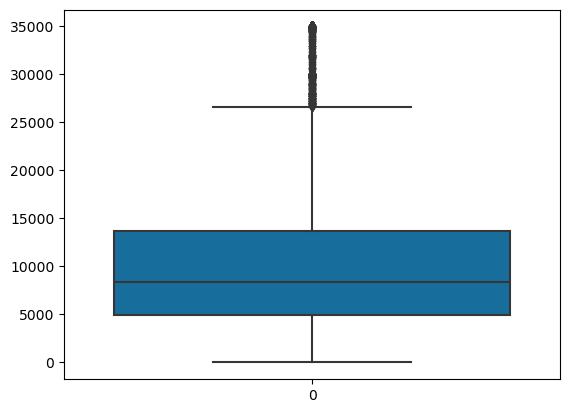

In [193]:
sns.boxplot(filtered_df.funded_amnt_inv)

In [194]:
filtered_df.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8377.637216
0.750    13650.000000
0.900    19750.000000
0.950    23950.000000
0.970    24975.000000
0.975    25425.000000
0.980    27954.459491
0.985    29933.298880
0.990    31971.086369
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

In [195]:
per_95_funded_amnt_inv = filtered_df['funded_amnt_inv'].quantile(0.95)
filtered_df = filtered_df[filtered_df.funded_amnt_inv <= per_95_annual_inc]

In [196]:
filtered_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,delinq_amnt
0,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT,24000.0,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9,0
1,2500,2500.0,60 months,15.27,59.83,C,C4,1.0,RENT,30000.0,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4,0
2,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT,12252.0,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10,0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT,49200.0,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37,0
5,5000,5000.0,36 months,7.90,156.46,A,A4,3.0,RENT,36000.0,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12,0


## Analysis of Defaulter (Charged Off) Data

<Axes: xlabel='loan_status', ylabel='count'>

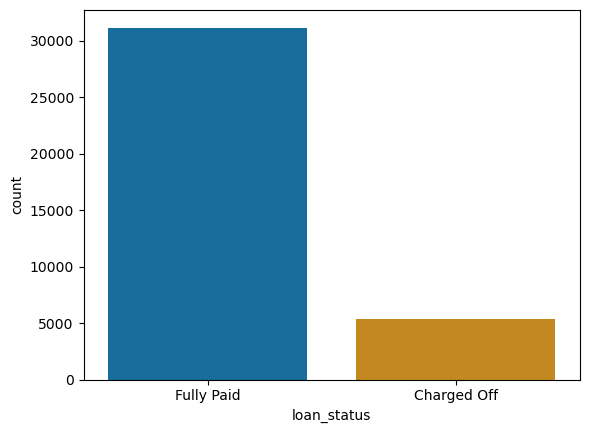

In [204]:
sns.countplot(x = 'loan_status', data = filtered_df)

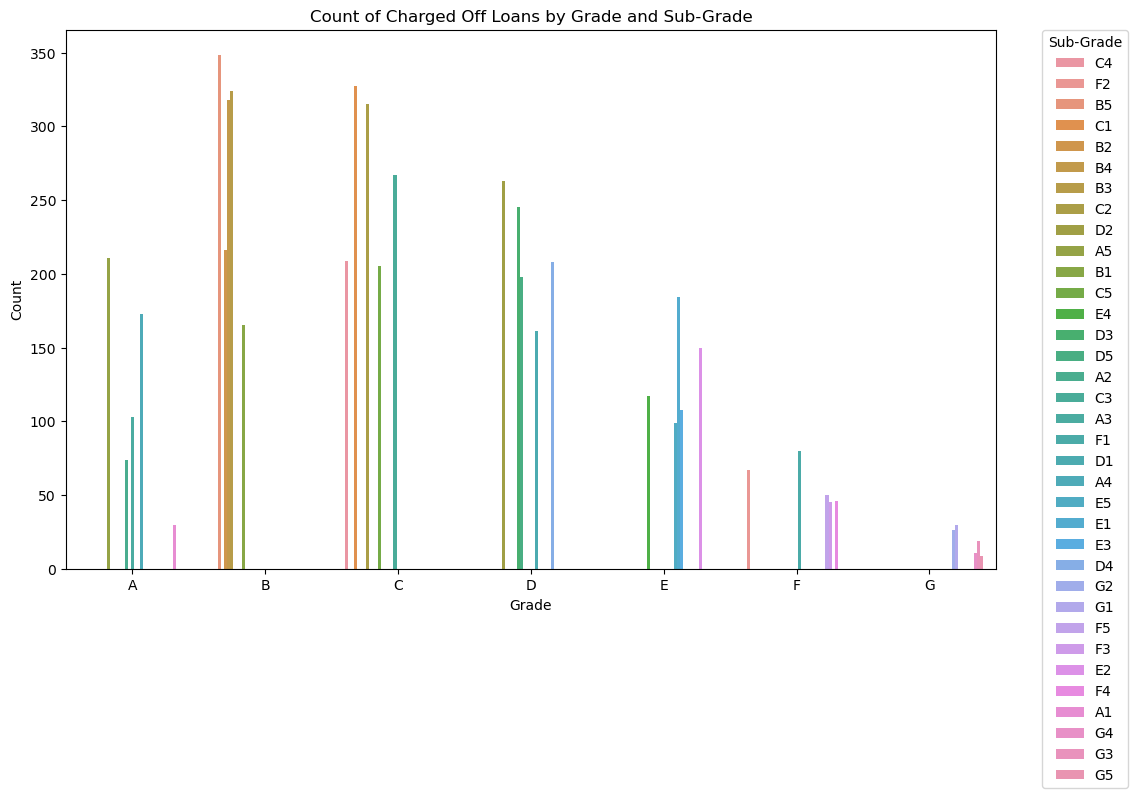

In [197]:
Charged_off = filtered_df[filtered_df['loan_status'] == 'Charged Off']

# Create the plot
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x='grade', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue='sub_grade', data=Charged_off)
plt.title("Count of Charged Off Loans by Grade and Sub-Grade")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.legend(title='Sub-Grade', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [199]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36558 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_amnt         36558 non-null  int64  
 1   funded_amnt_inv   36558 non-null  float64
 2   term              36558 non-null  object 
 3   int_rate          36558 non-null  float64
 4   installment       36558 non-null  float64
 5   grade             36558 non-null  object 
 6   sub_grade         36558 non-null  object 
 7   emp_length        35544 non-null  float64
 8   home_ownership    36558 non-null  object 
 9   annual_inc        36558 non-null  float64
 10  issue_d           36558 non-null  object 
 11  loan_status       36558 non-null  object 
 12  purpose           36558 non-null  object 
 13  dti               36558 non-null  float64
 14  earliest_cr_line  36558 non-null  object 
 15  inq_last_6mths    36558 non-null  int64  
 16  open_acc          36558 non-null  int64  
 17

<Axes: xlabel='grade', ylabel='count'>

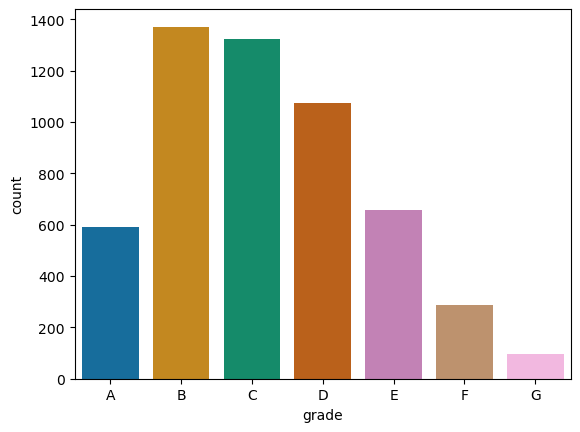

In [203]:
sns.countplot(x = 'grade', data = filtered_df[filtered_df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

## Analyzing home ownership data

<Axes: xlabel='home_ownership', ylabel='count'>

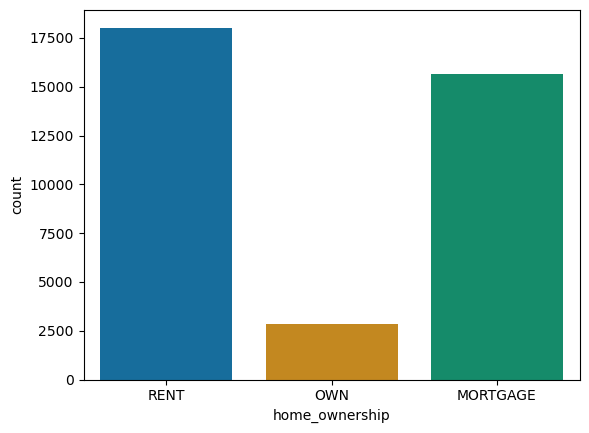

In [205]:
sns.countplot(x = 'home_ownership', data = filtered_df)

<Axes: xlabel='home_ownership', ylabel='count'>

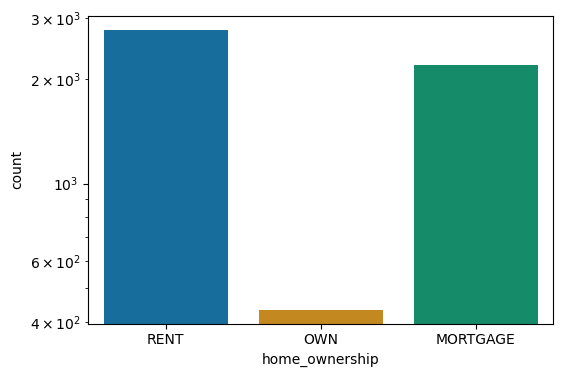

In [206]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=filtered_df[filtered_df['loan_status']=='Charged Off'])

## Analyzing Purpose of loan data

<Axes: xlabel='count', ylabel='purpose'>

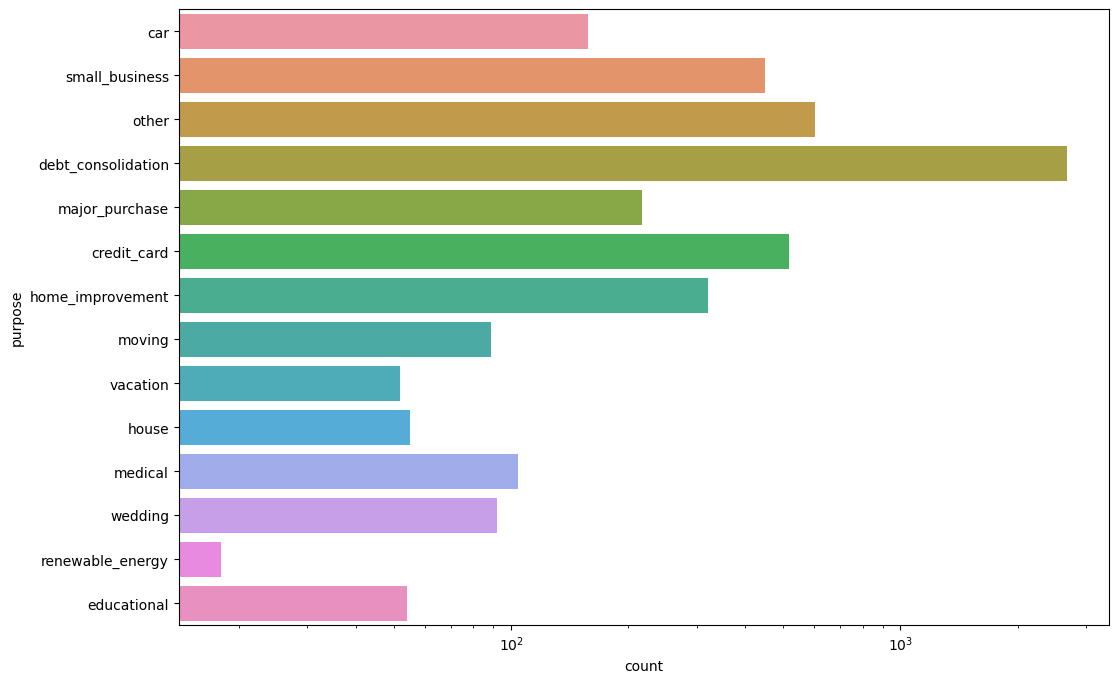

In [208]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=filtered_df[filtered_df.loan_status == 'Charged Off'])

#### Analyzing interest rate 

In [209]:
filtered_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,delinq_amnt
0,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT,24000.0,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9,0
1,2500,2500.0,60 months,15.27,59.83,C,C4,1.0,RENT,30000.0,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4,0
2,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT,12252.0,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10,0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT,49200.0,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37,0
5,5000,5000.0,36 months,7.90,156.46,A,A4,3.0,RENT,36000.0,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12,0


#### Creating bins for numericals  to make them categorical

In [215]:
#creating bins for int_rate,open_acc,revol_util,total_acc
filtered_df['int_rate_groups'] = pd.cut(filtered_df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
filtered_df['open_acc_groups'] = pd.cut(filtered_df['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
filtered_df['revol_util_groups'] = pd.cut(filtered_df['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
filtered_df['total_acc_groups'] = pd.cut(filtered_df['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
filtered_df['annual_inc_groups'] = pd.cut(filtered_df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [216]:
filtered_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,delinq_amnt,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT,24000.0,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9,0,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,C4,1.0,RENT,30000.0,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4,0,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT,12252.0,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10,0,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT,49200.0,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37,0,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,A4,3.0,RENT,36000.0,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12,0,5%-9%,2-10,20-40,2-20,31k-58k


#### Analyzing interest rate wrt the interest rate bins created

<Axes: xlabel='emp_length', ylabel='count'>

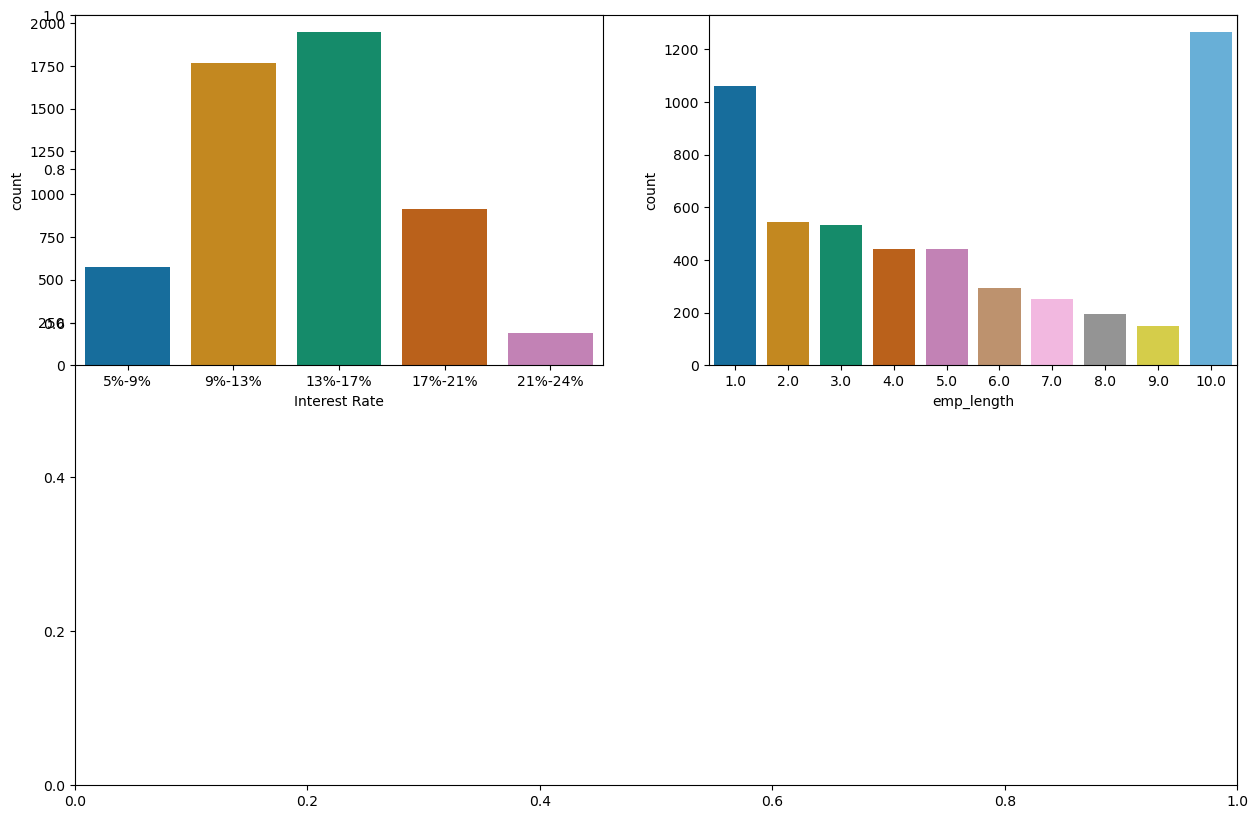

In [233]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=filtered_df[filtered_df.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=filtered_df[filtered_df.loan_status == 'Charged Off'])

#### Similar analysis for open_acc,revol_util,total_acc,annual_inc

<Axes: xlabel='open_acc_groups', ylabel='count'>

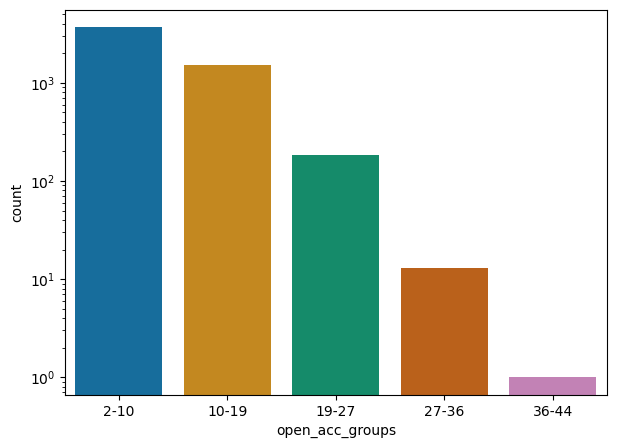

In [234]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=filtered_df[filtered_df.loan_status == 'Charged Off'])

<Axes: xlabel='revol_util_groups', ylabel='count'>

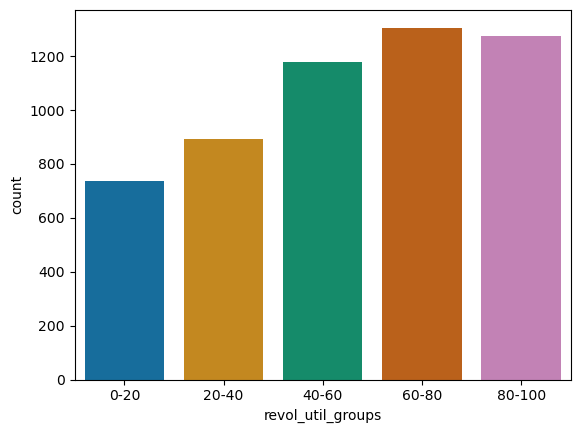

In [235]:
sns.countplot(x='revol_util_groups', data=filtered_df[filtered_df.loan_status == 'Charged Off'])

<Axes: xlabel='total_acc_groups', ylabel='count'>

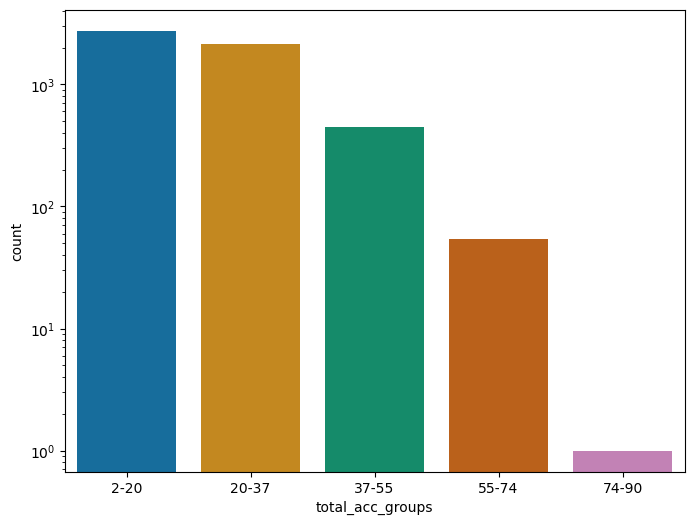

In [236]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=filtered_df[filtered_df.loan_status == 'Charged Off'])

<Axes: xlabel='annual_inc_groups', ylabel='count'>

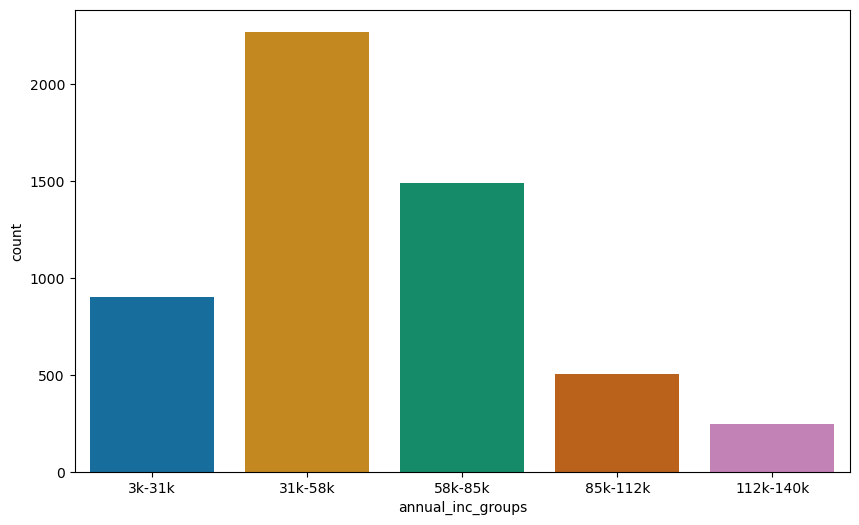

In [237]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=filtered_df[filtered_df.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='term'>

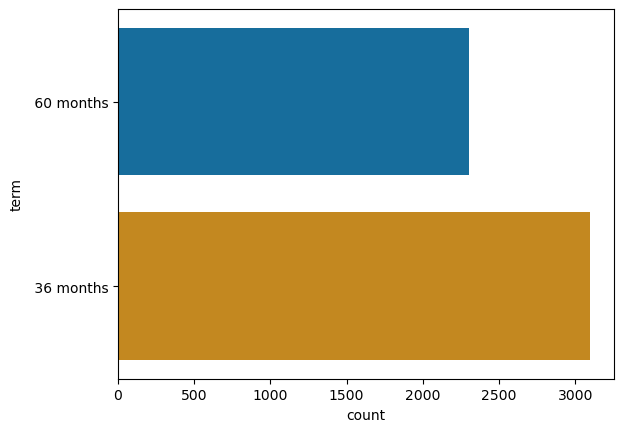

In [238]:
sns.countplot(y='term', data=filtered_df[filtered_df.loan_status == 'Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

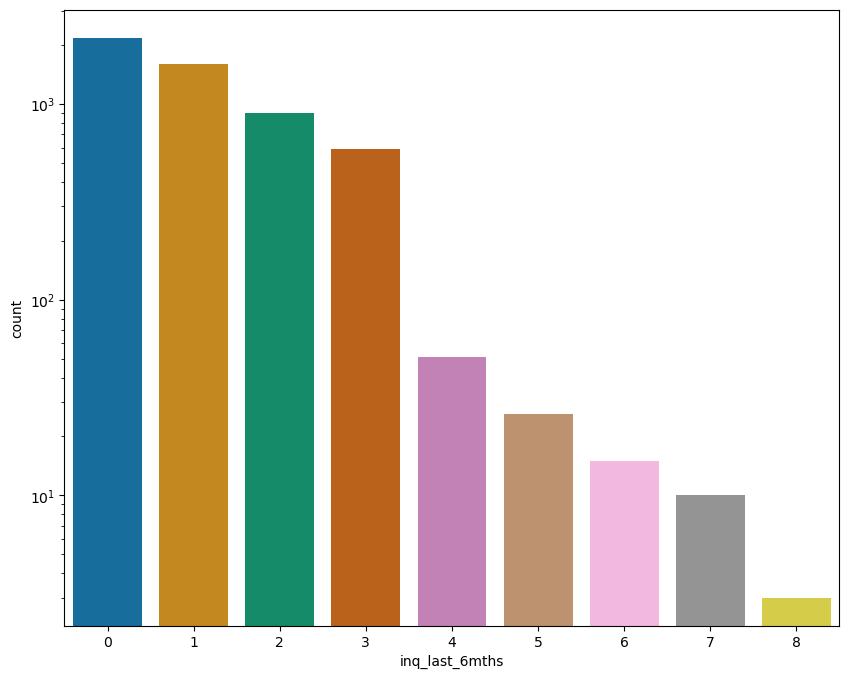

In [240]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=filtered_df[filtered_df['loan_status']=='Charged Off'])

<Axes: xlabel='pub_rec', ylabel='count'>

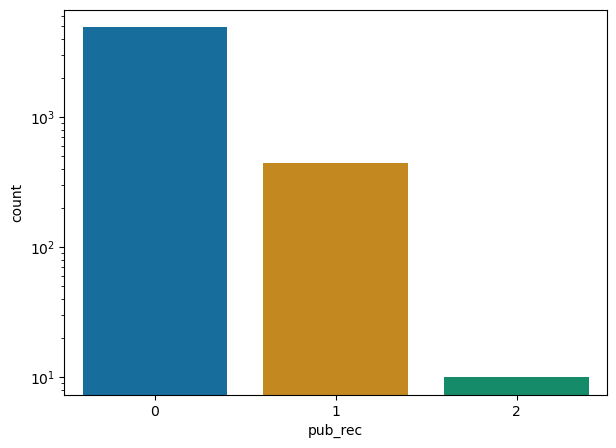

In [241]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=filtered_df[filtered_df['loan_status']=='Charged Off'])

### Analyzing by issued month and year of loan

In [242]:
df_month_year = filtered_df['issue_d'].str.partition("-", True)     
filtered_df['issue_month']=df_month_year[0]                       
filtered_df['issue_year']='20' + df_month_year[2]

In [243]:
filtered_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,delinq_amnt,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT,24000.0,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9,0,9%-13%,2-10,80-100,2-20,3k-31k,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,C4,1.0,RENT,30000.0,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4,0,13%-17%,2-10,0-20,2-20,3k-31k,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT,12252.0,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10,0,13%-17%,2-10,80-100,2-20,3k-31k,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT,49200.0,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37,0,13%-17%,2-10,20-40,20-37,31k-58k,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,A4,3.0,RENT,36000.0,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12,0,5%-9%,2-10,20-40,2-20,31k-58k,Dec,2011


<Axes: xlabel='issue_year', ylabel='count'>

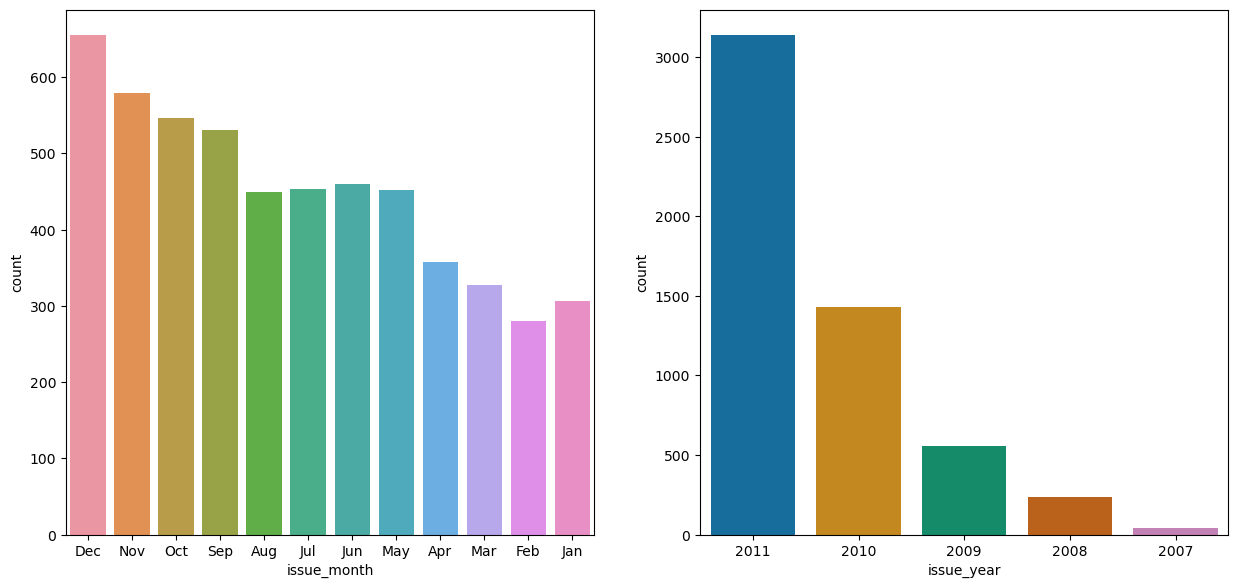

In [244]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=filtered_df[filtered_df['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=filtered_df[filtered_df['loan_status']=='Charged Off'])

### Maximum number of defaults occured when the loan was sanctioned in Dec. 
### Loan issued in the year 2011 were also more likely to default as compared to other years

## Analyzing installment, dti, loan_amnt 


In [246]:
filtered_df['installment_groups'] = pd.cut(filtered_df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
filtered_df['funded_amnt_inv_group'] = pd.cut(filtered_df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
filtered_df['loan_amnt_groups'] = pd.cut(filtered_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
filtered_df['dti_groups'] = pd.cut(filtered_df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

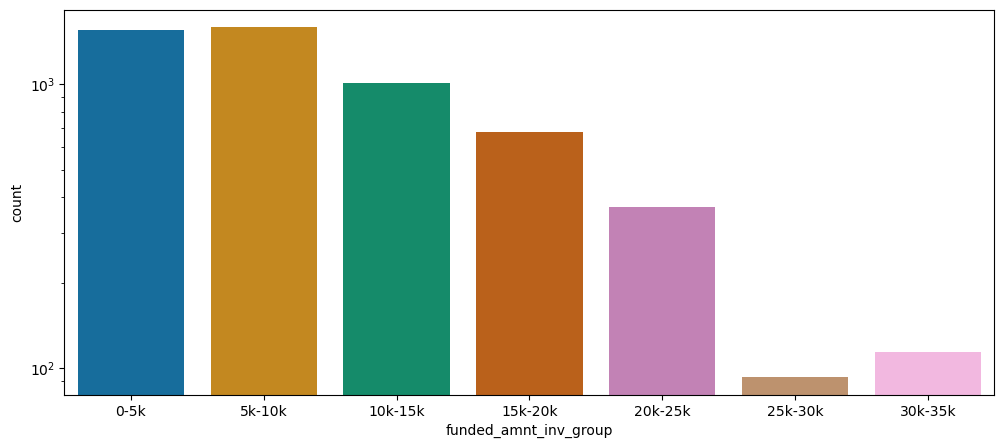

In [247]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=filtered_df[filtered_df['loan_status']=='Charged Off'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

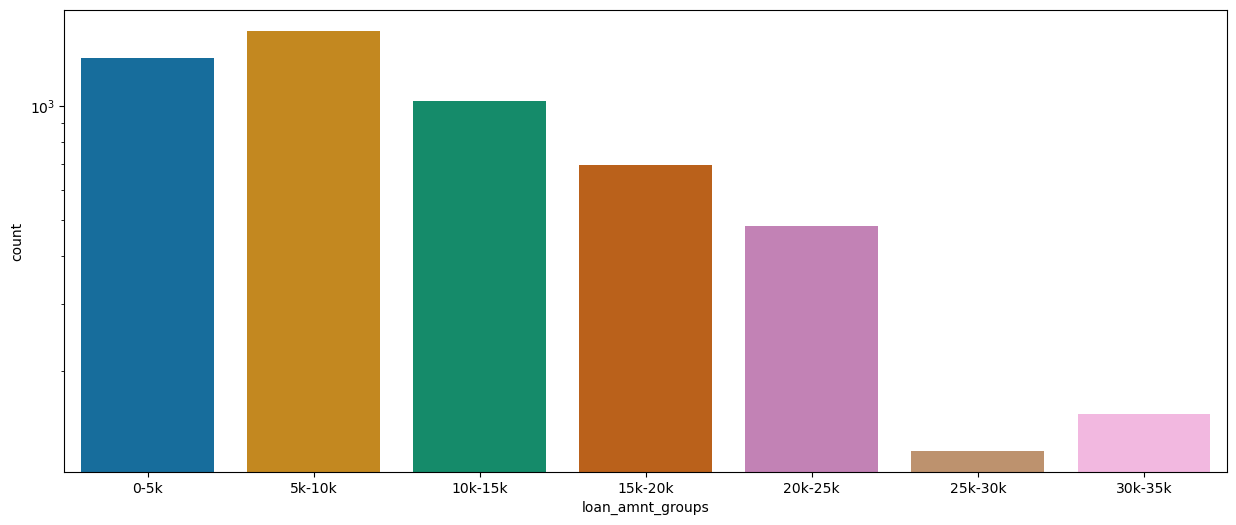

In [248]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=filtered_df[filtered_df['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

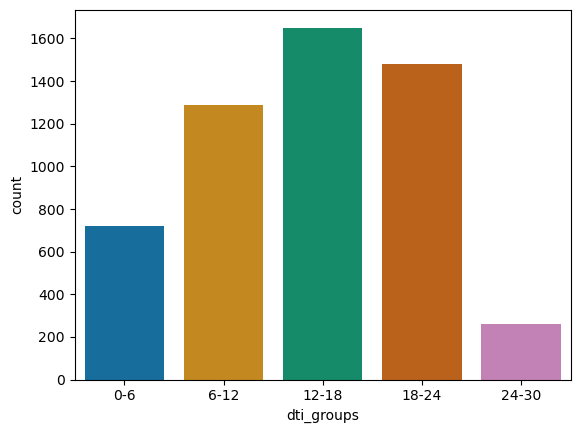

In [249]:
sns.countplot(x='dti_groups', data=filtered_df[filtered_df['loan_status']=='Charged Off'])

<Axes: xlabel='installment_groups', ylabel='count'>

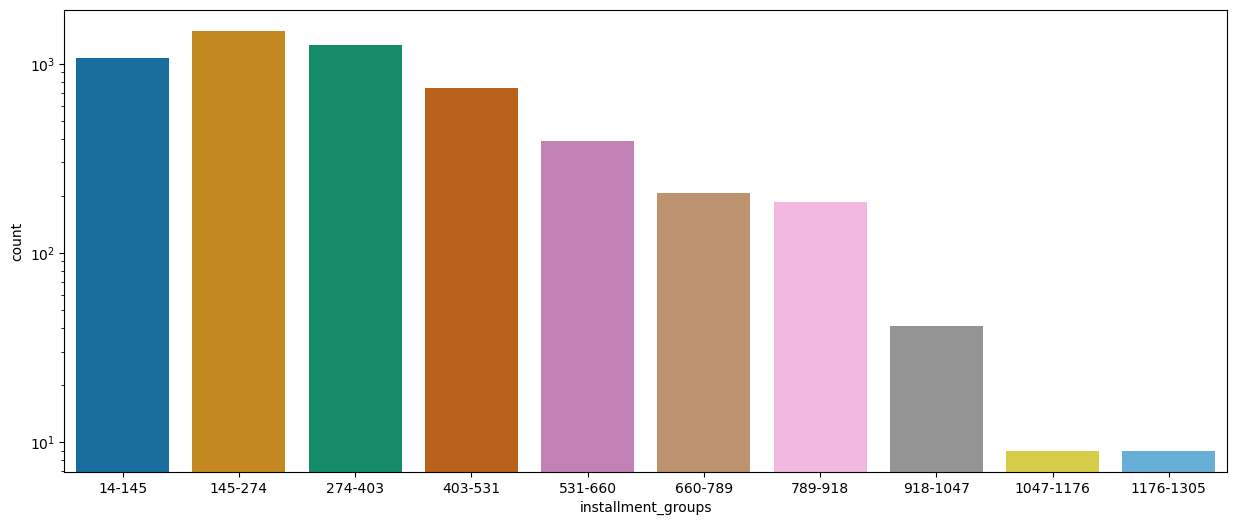

In [250]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=filtered_df[filtered_df['loan_status']=='Charged Off'])

# The Following Observations Can Be Made

### The above analysis concerning the charged off loans for each variable suggests the following. There is a higher probability of defaulting when : 

- Applicants having house_ownership as 'RENT'
- Applicants who use the loan to clear other debts
- Applicants who receive interest at the rate of 13-17%
- Applicants who have an income of range 31201 - 58402
- Applicants who have 20-37 open_acc
- Applicants with employement length of 10
- When funded amount by investor is between 5000-10000
- Loan amount is between 5429 - 10357
- Dti is between 12-18
- When monthly installments are between 145-274
- Term of 36 months
- When the loan status is Not verified
- When the no of enquiries in last 6 months is 0
- When the number of derogatory public records is 0
- When the purpose is 'debt_consolidation'
- Grade is 'B'
- And a total grade of 'B5' level.

- The 2011 Peak may reflect the financial crisis that was present in the previous years in the USA (2009)

## Analysing annual income with other columns for more insights 

#### Annual income vs loan purpose

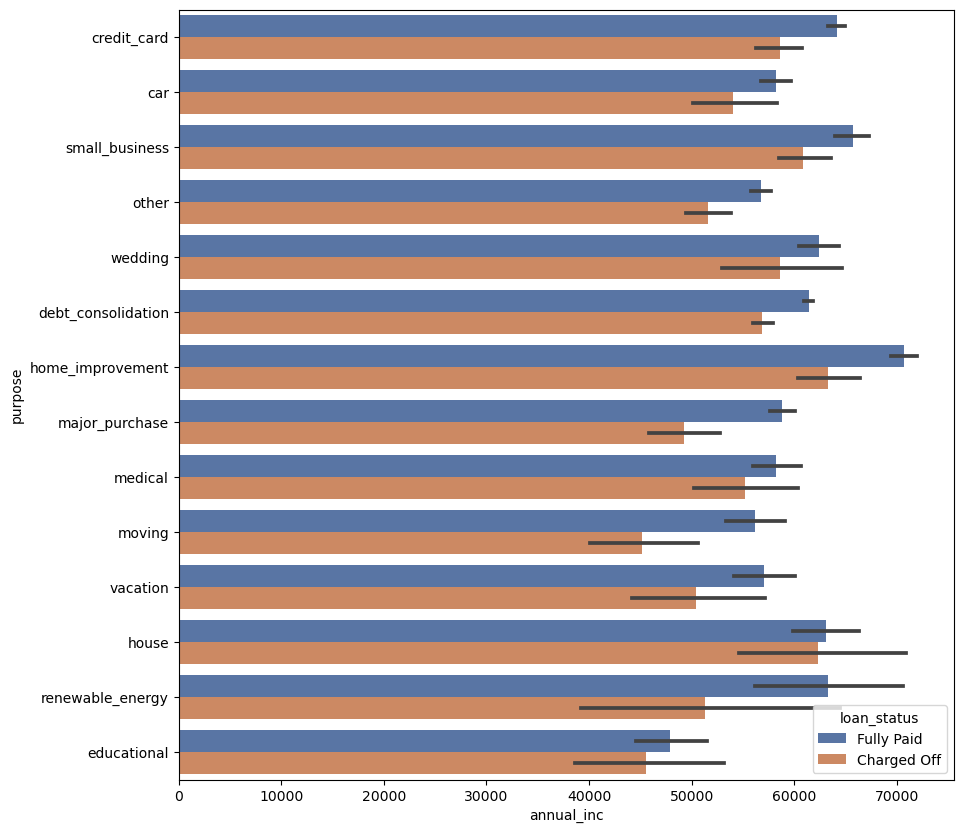

In [252]:
plt.figure(figsize=(10,10))
sns.barplot(data =filtered_df,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

### Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

#### Annual income vs home ownership

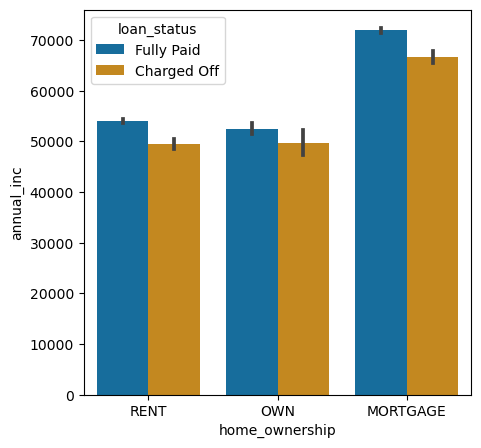

In [256]:
plt.figure(figsize=(5,5))
sns.barplot(data =filtered_df,x='home_ownership', y='annual_inc', hue ='loan_status')
plt.show()

### Annual Income vs Loan amount

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

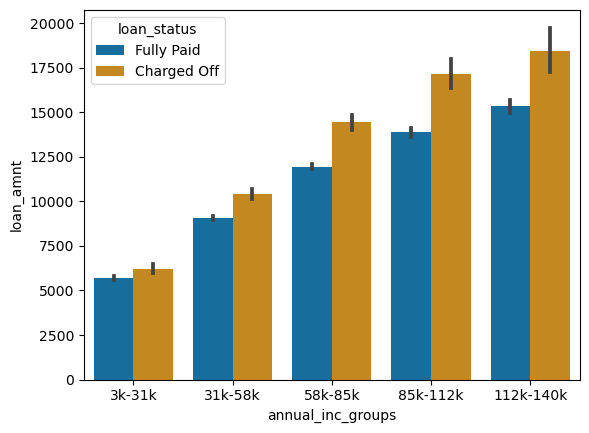

In [257]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = filtered_df)

##### Across all the income groups, the loan amount is higher for people who defaulted.

#### Annual income vs int_rate

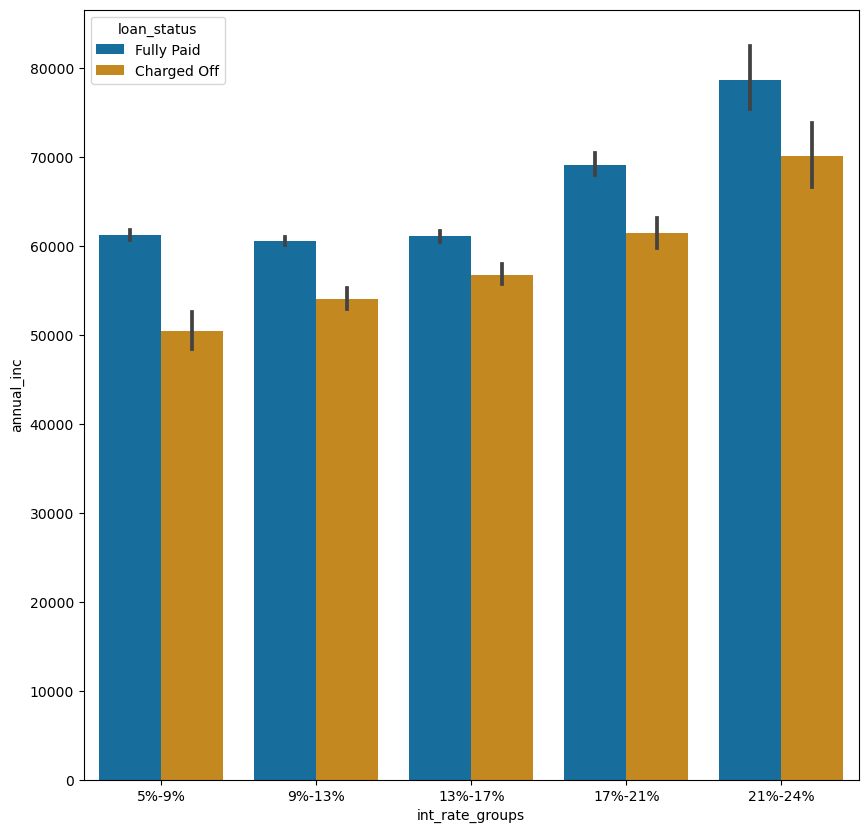

In [258]:
plt.figure(figsize=(10,10))
sns.barplot(data =filtered_df,x='int_rate_groups', y='annual_inc', hue ='loan_status')
plt.show()

## Analysis of loan_amount with other columns for more insights 

#### Loan Amount vs Interest Rate

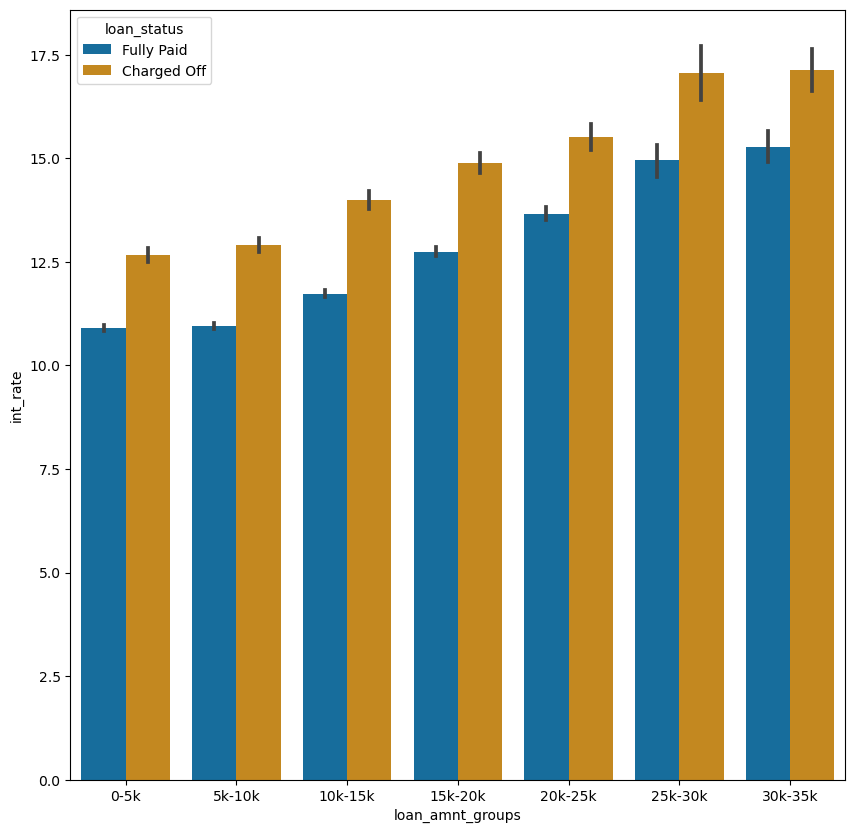

In [260]:
plt.figure(figsize=(10,10))
sns.barplot(data =filtered_df,x='loan_amnt_groups', y='int_rate', hue ='loan_status')
plt.show()

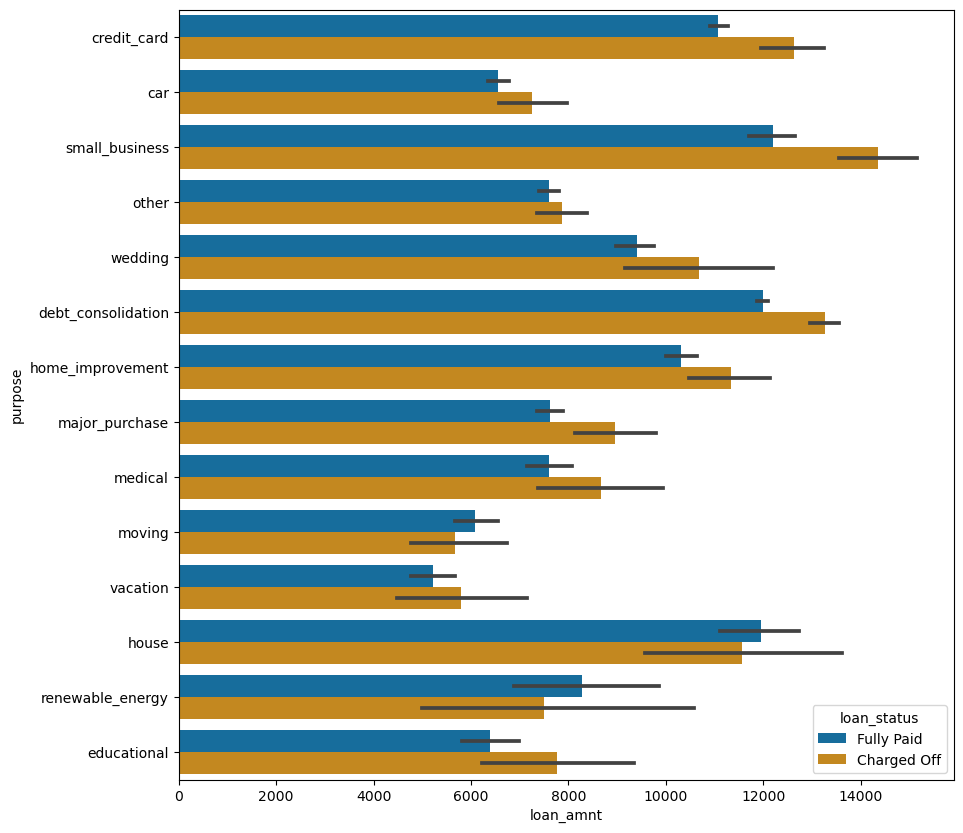

In [261]:
plt.figure(figsize=(10,10))
sns.barplot(data =filtered_df,x='loan_amnt', y='purpose', hue ='loan_status')
plt.show()

#### Loan vs House Ownership

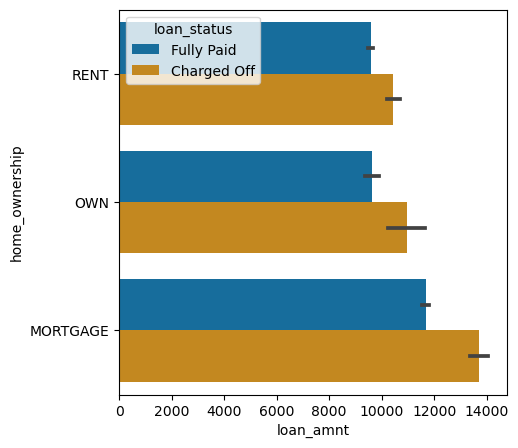

In [263]:
plt.figure(figsize=(5,5))
sns.barplot(data =filtered_df,x='loan_amnt', y='home_ownership', hue ='loan_status')
plt.show()

#### Loan amount vs month issued and year issued

<Axes: xlabel='issue_year', ylabel='loan_amnt'>

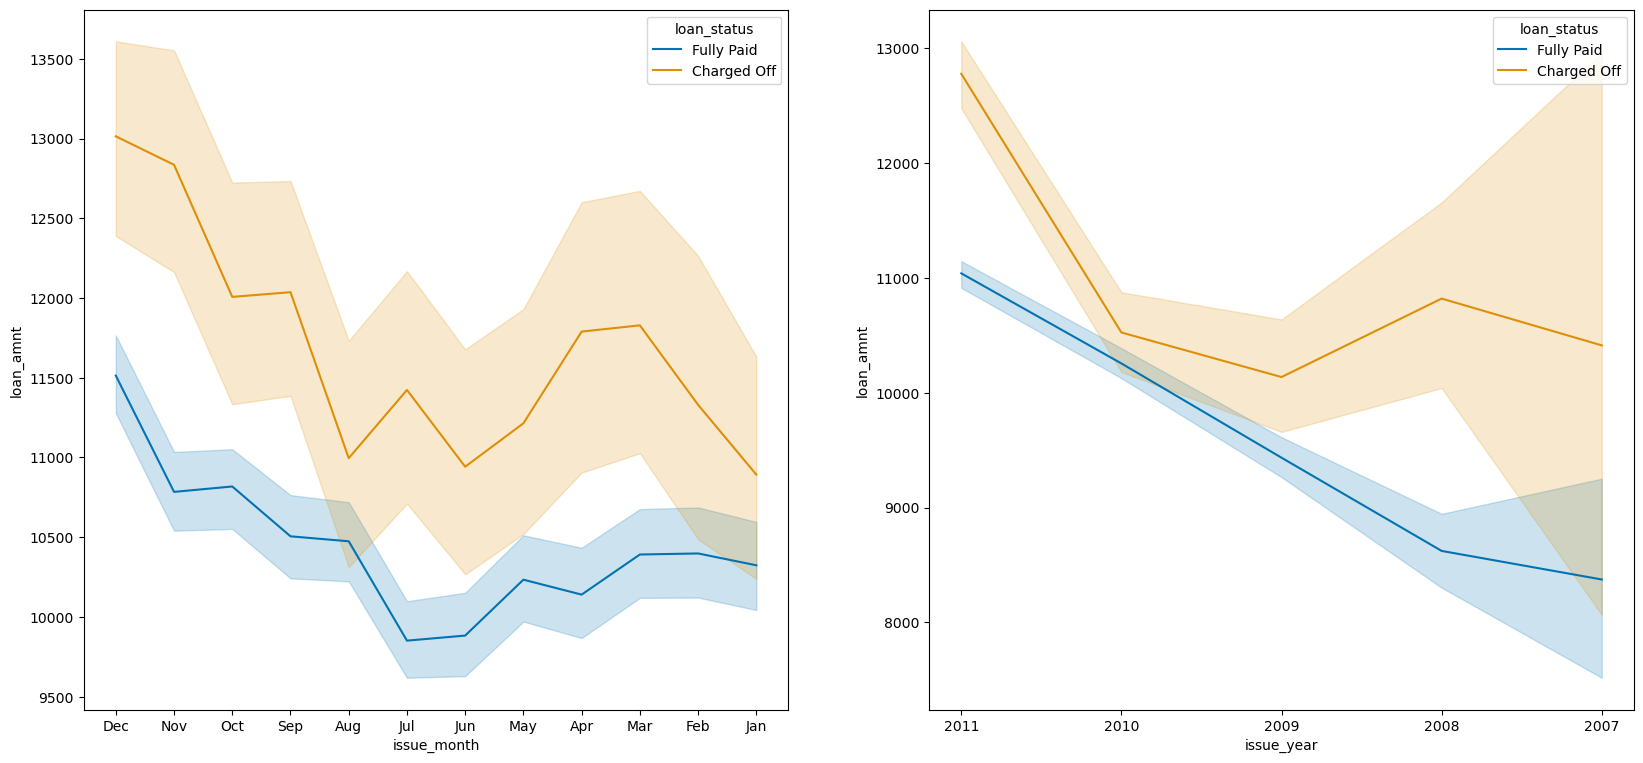

In [264]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =filtered_df,y='loan_amnt', x='issue_month', hue ='loan_status')
plt.subplot(222)
sns.lineplot(data =filtered_df,y='loan_amnt', x='issue_year', hue ='loan_status')

#### Loan amount vs Grade

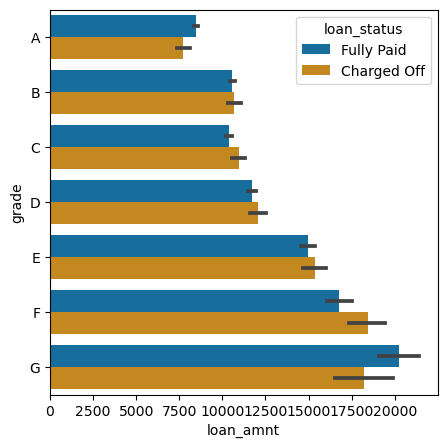

In [268]:
plt.figure(figsize=(5,5))
sns.barplot(data =filtered_df,x='loan_amnt', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'])
plt.show()

<Axes: xlabel='emp_length', ylabel='loan_amnt'>

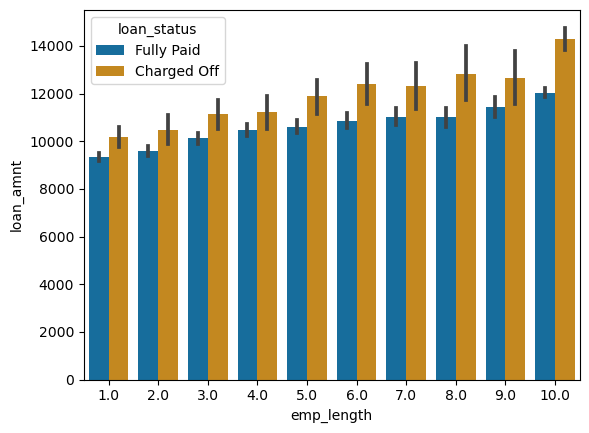

In [271]:
sns.barplot(data =filtered_df,y='loan_amnt', x='emp_length', hue ='loan_status')


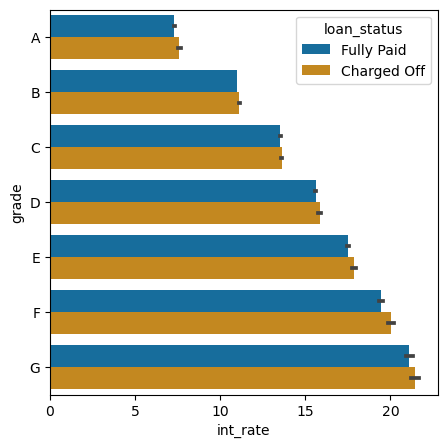

In [276]:
plt.figure(figsize=(5,5))
sns.barplot(data =filtered_df,x='int_rate', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 640x480 with 0 Axes>

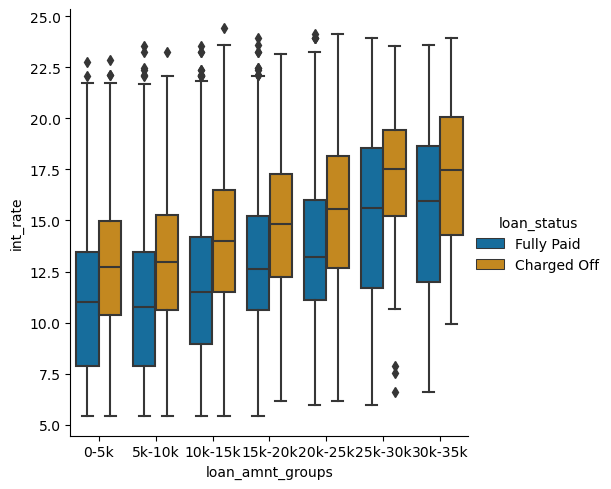

In [277]:
plt.tight_layout()
sns.catplot(data =filtered_df,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',kind = 'box')

### Basically higher interest rates were more likely to be charged off across all loan amounts

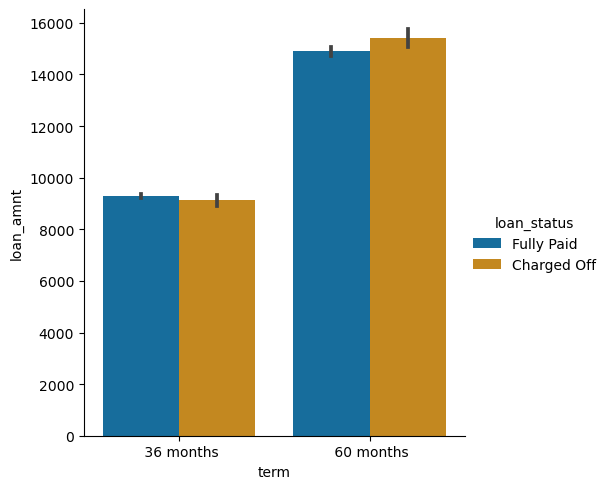

In [278]:

sns.catplot(x = 'term', y = 'loan_amnt', data = filtered_df,hue = 'loan_status', kind = 'bar')

# Observations

### The above analysis with respect to the charged off loans. There is a more probability of defaulting when : 

- Applicants taking loan for 'home improvement' and have income of 60k -70k
- Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
- Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
- Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
- When grade is F and loan amount is between 15k-20k
- When employment length is 10yrs and loan amount is 12k-14k 
- When the loan is verified and loan amount is above 16k
- For grade G and interest rate above 20%

In [ ]:
aaaa